<a href="https://colab.research.google.com/github/farrahfox/Probability-Statistics/blob/main/Farrah_Fox_Math24_Lab8_Alexnet_Load_Slides_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# defines a function that returns the converted input
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

# takes a data array and converts it into a PyTorch tensor that resides on the GPU (Graphics Processing Unit) if it's available
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

# defines a function that returns a plot
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

# defines a function that returns a URL that you can use to download a PDF version of the specified slide
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

# defines a function that seems to be designed to fetch slides from a Google Slides presentation and convert them into images
def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

# defines a function that returns the preprocessed tensor ready for use in a machine learning model
def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



In [ ]:
# this snippet loads a pre-trained AlexNet model with default weights, converts the labels to integers from a JSON file fetched from a URL,
# and prepares the model for evaluation.
# It's a typical setup for working with pre-trained models in PyTorch, particularly in environments

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 108MB/s] 


In [ ]:
url = "https://docs.google.com/presentation/d/1bWlo5sP0xRUk-W8_y_7SwzYTFmswn3yDjELzJvbGJ28/edit#slide=id.g2b78f466108_0_0"

In [ ]:
# processes a list of images obtained from a URL:
  # It plots each image.
  # It loads each image.
  # It appends the loaded images into a list.
  # Finally, it converts the list of loaded images into a PyTorch tensor and stacks them vertically.

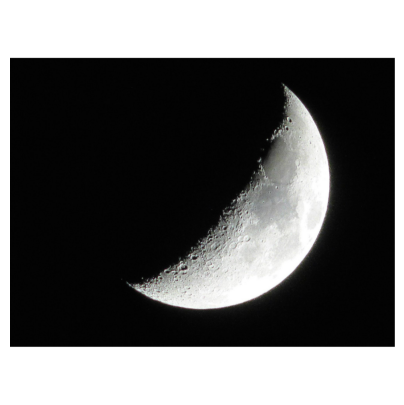

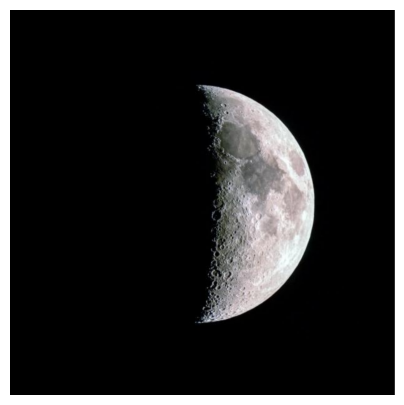

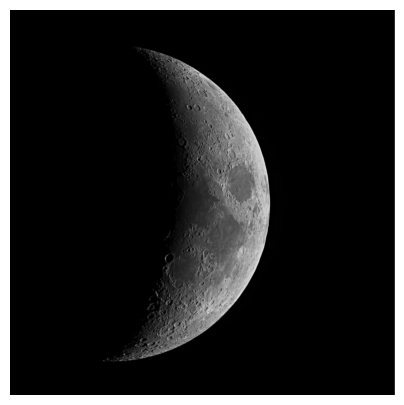

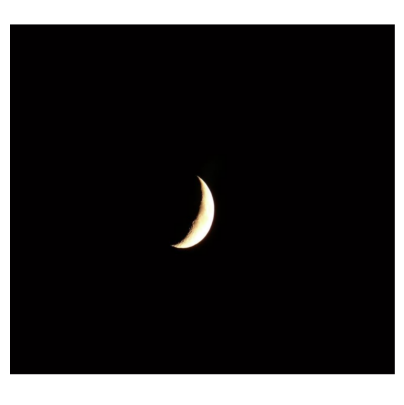

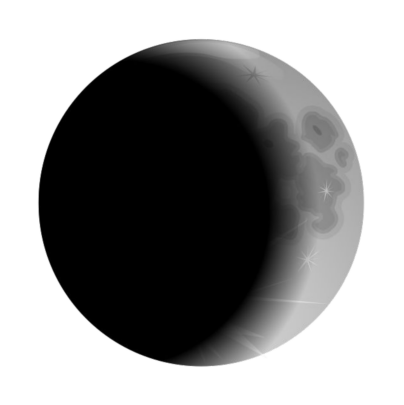

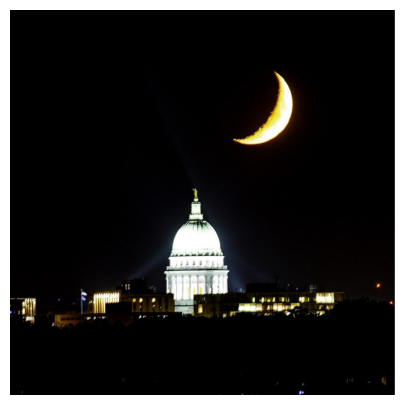

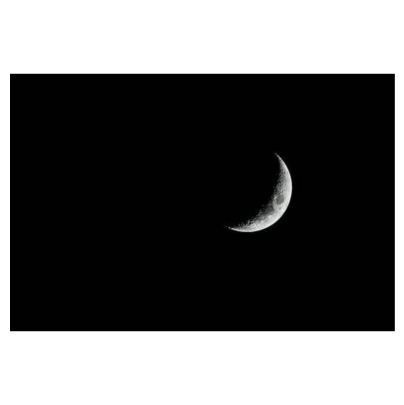

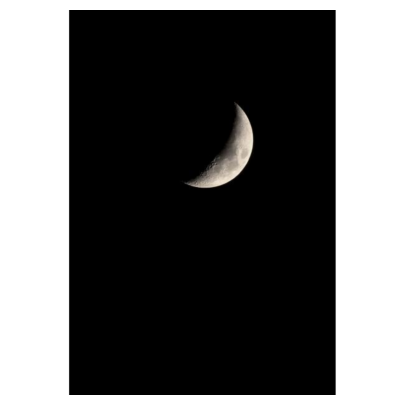

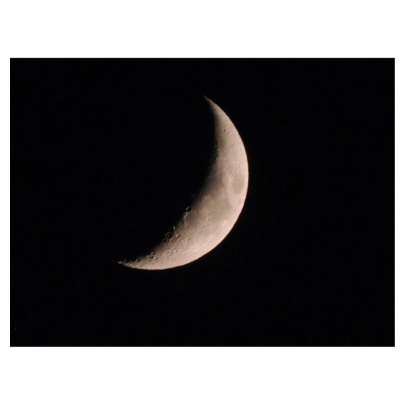

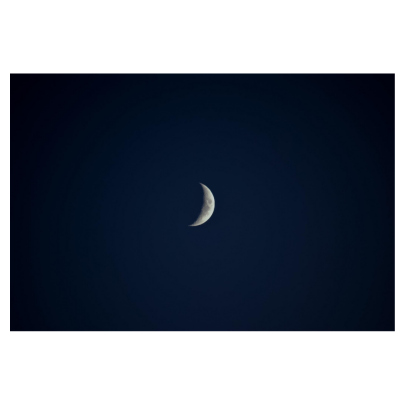

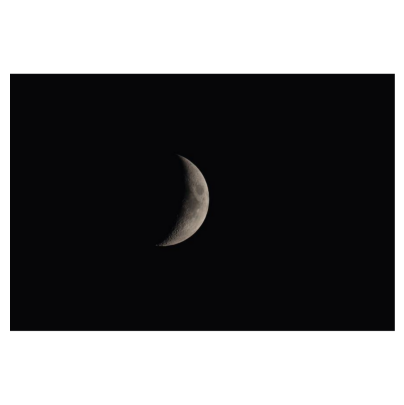

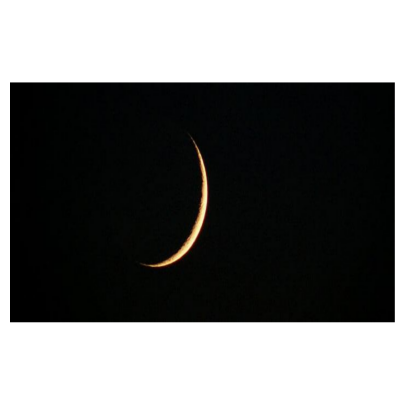

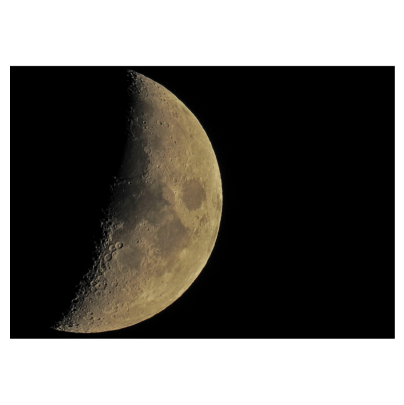

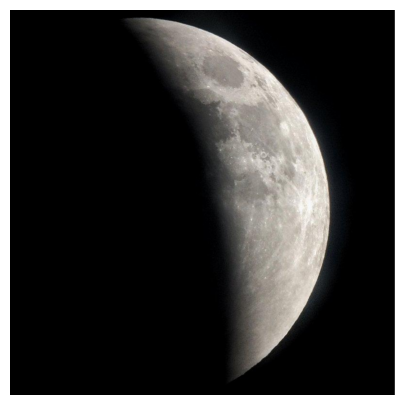

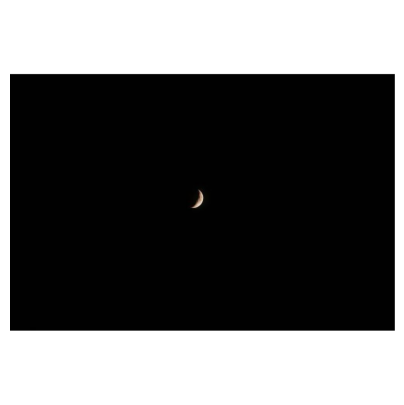

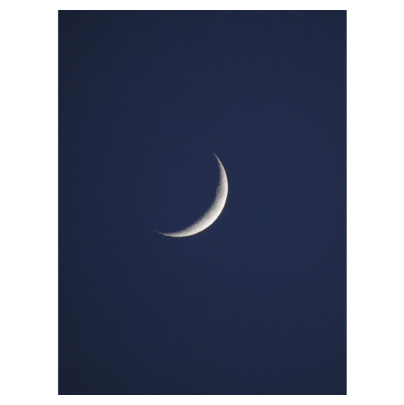

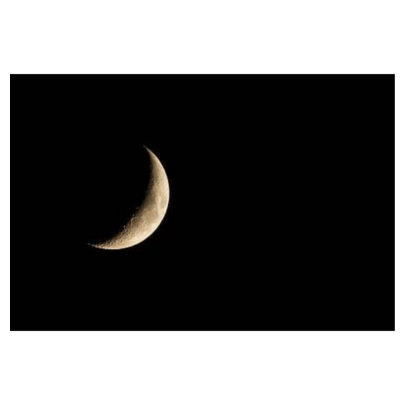

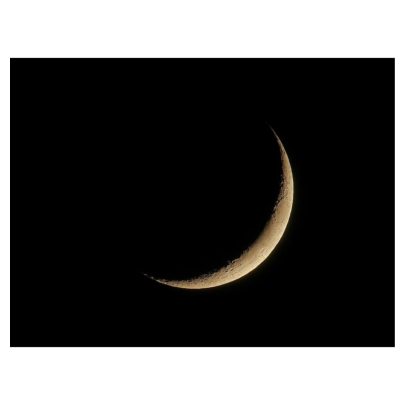

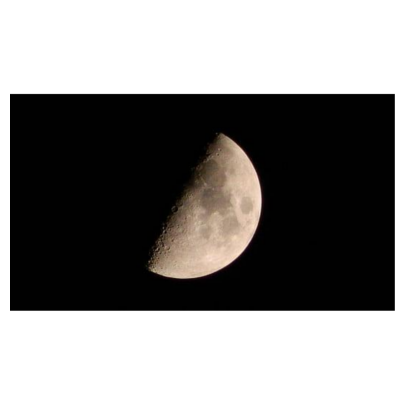

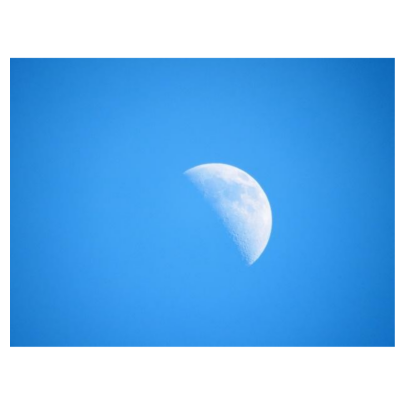

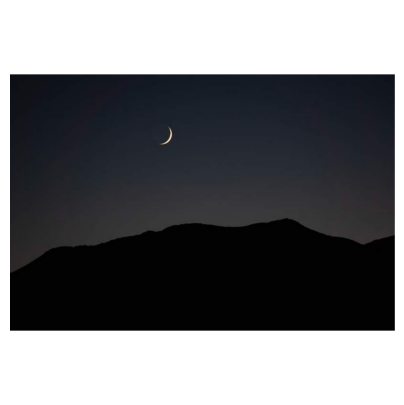

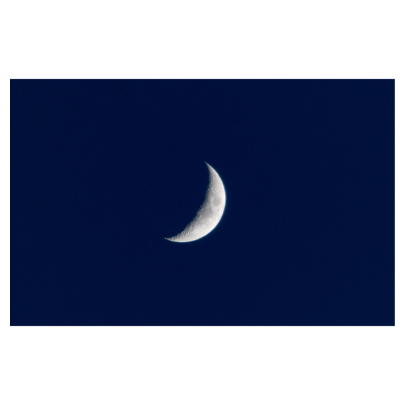

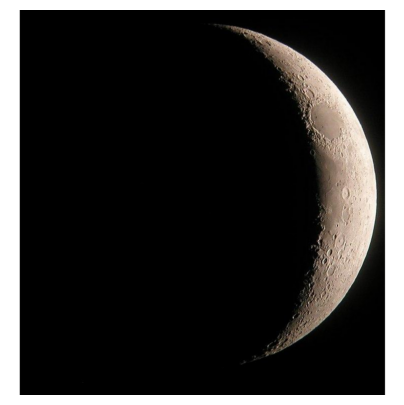

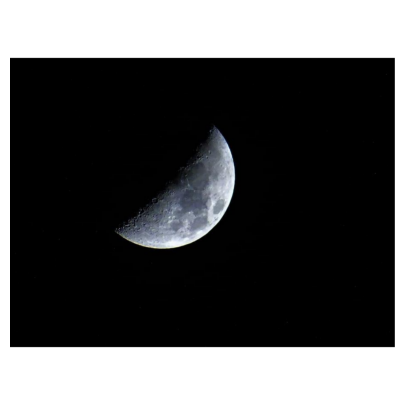

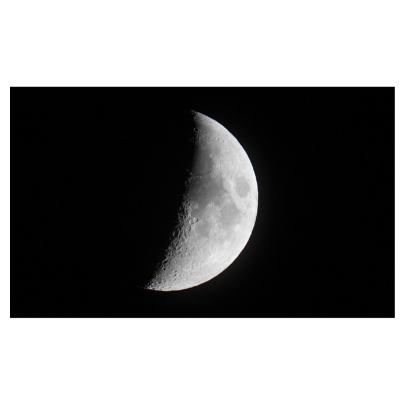

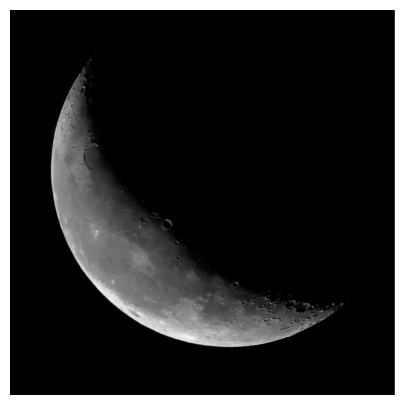

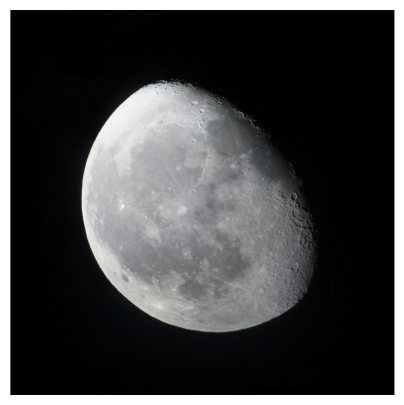

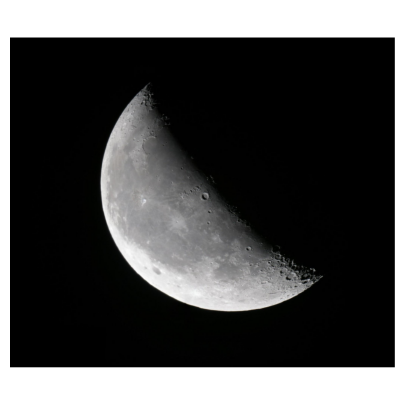

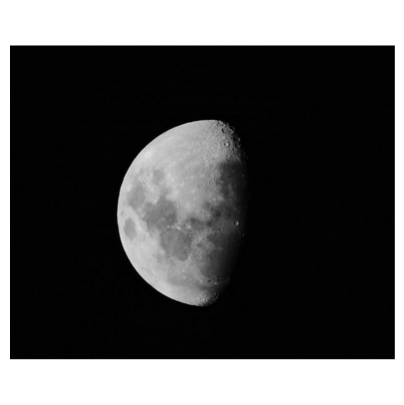

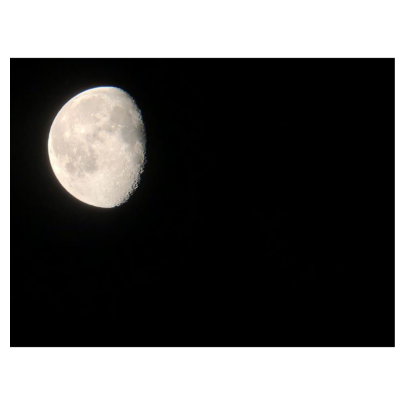

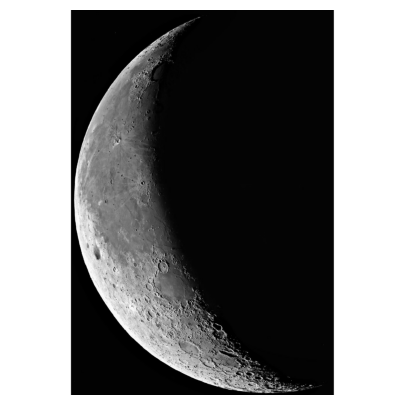

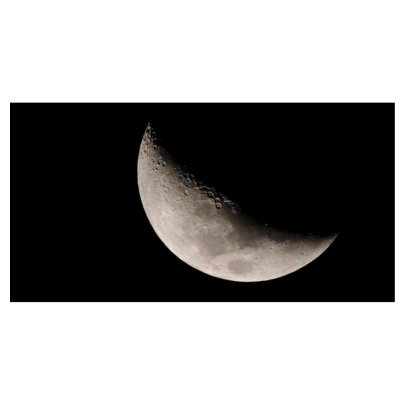

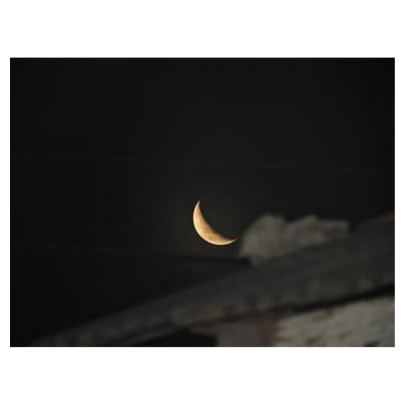

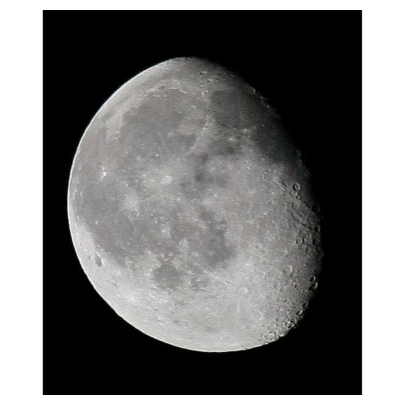

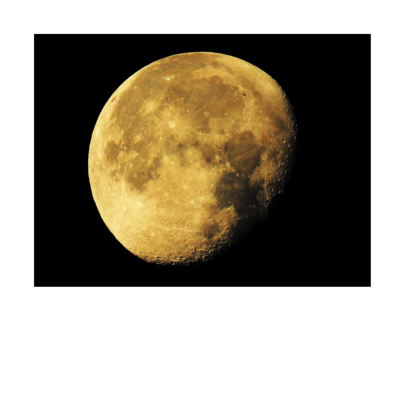

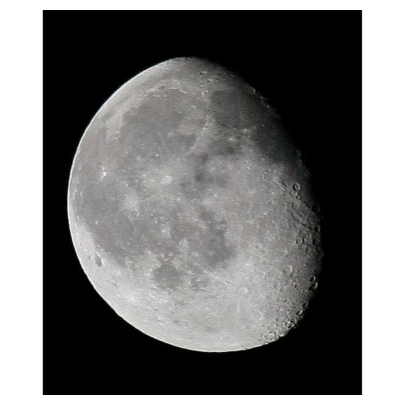

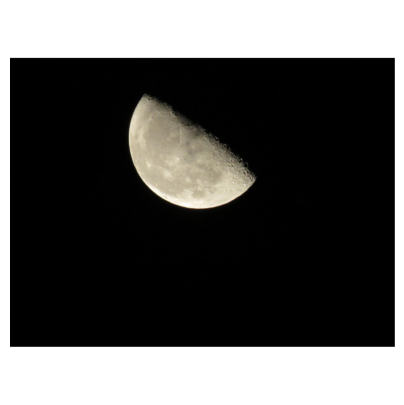

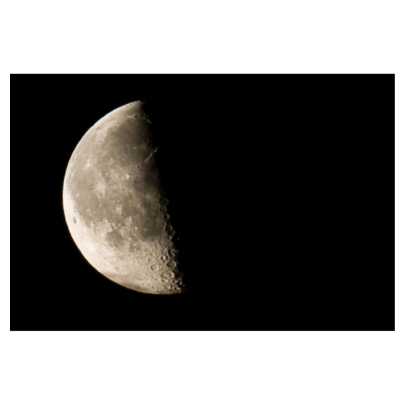

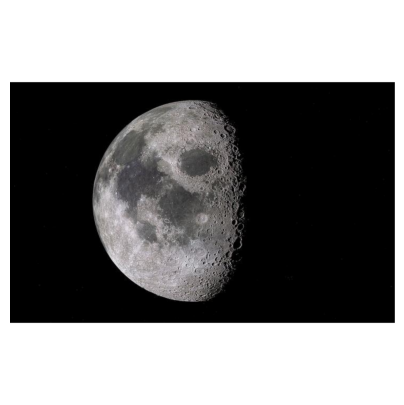

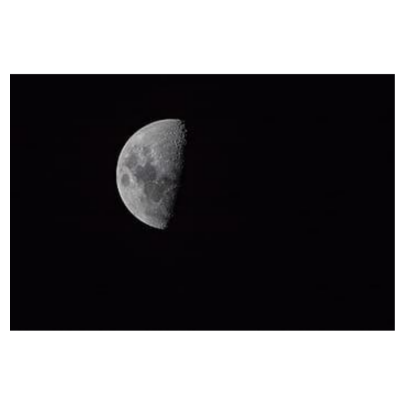

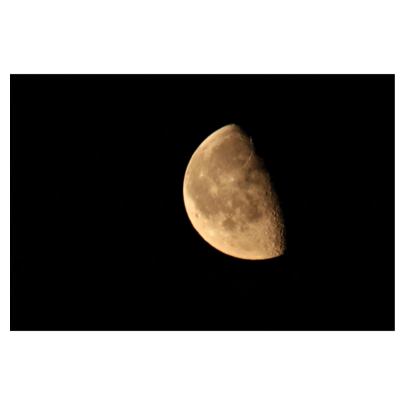

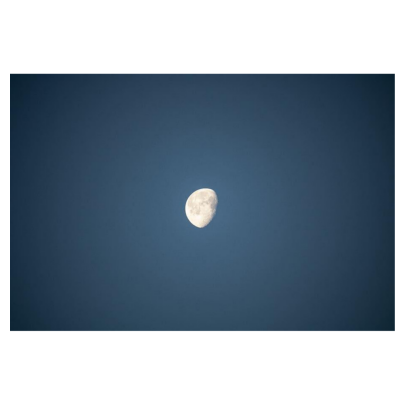

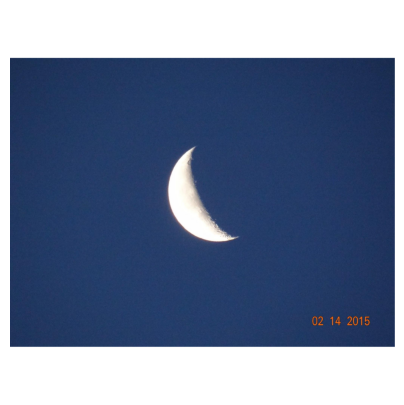

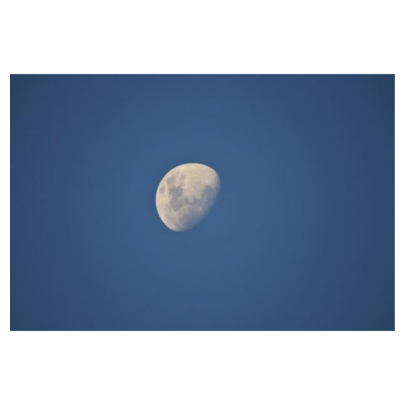

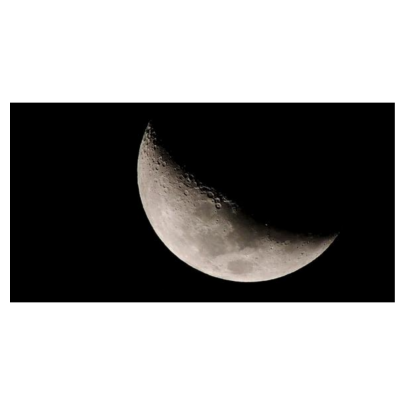

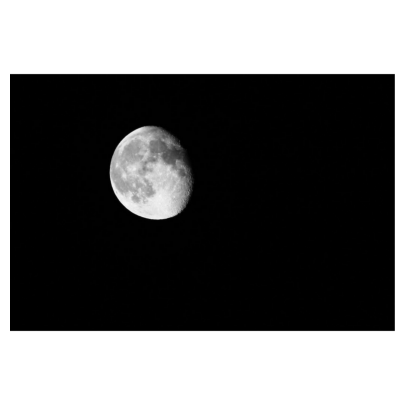

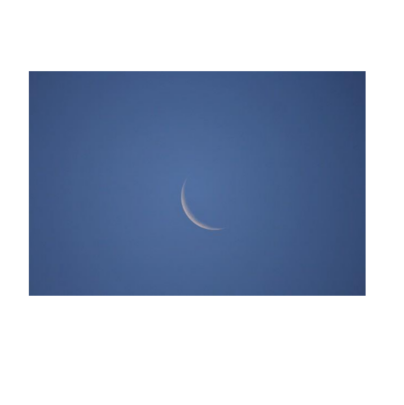

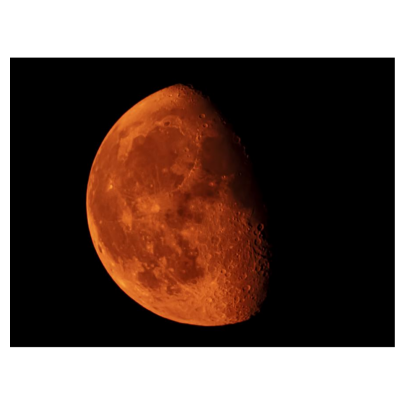

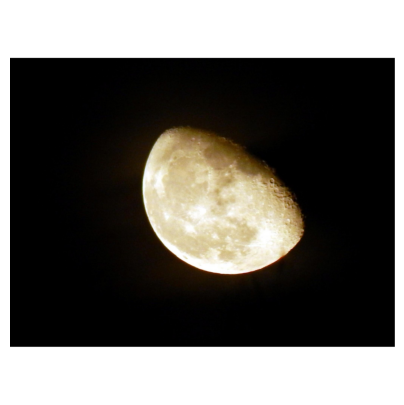

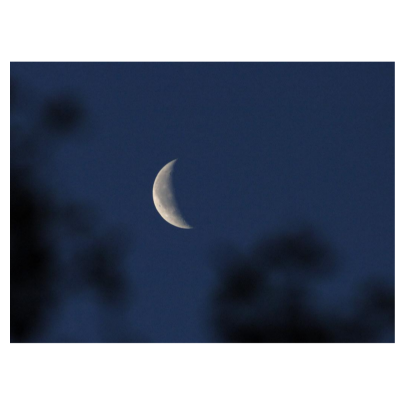

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
# means 50 slides, 3 color channels, 224 height, 224 width
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[ 0.1857,  0.3553,  6.9922,  ...,  3.4517,  1.4803,  9.3823],
        [-0.3218,  1.1765,  4.4884,  ...,  5.9954,  2.5057,  7.4899],
        [-0.2254,  1.0455,  4.6386,  ...,  5.0776,  2.8779,  5.9254],
        ...,
        [-1.1696,  3.2727, -4.9598,  ...,  7.3302,  2.8243,  2.6782],
        [ 0.6294,  0.7231, -1.5968,  ...,  3.5227,  1.6104,  4.3454],
        [-1.0943, -0.8180,  2.5997,  ..., -0.7001, -0.6031,  3.1779]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
# makes guesses for each picture from the google slides
for i in list(guesses):
    print(labels[i])

nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
bubble
puck, hockey puck
space shuttle
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
abaya
nematode, nematode worm, roundworm
notebook, notebook computer
cleaver, meat cleaver, chopper
mailbag, postbag
mortar
pick, plectrum, plectron
cleaver, meat cleaver, chopper
binder, ring-binder
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
nematode, nematode worm, roundworm
cleaver, meat cleaver, chopper
jellyfish
cleaver, meat cleaver, chopper
cleaver, meat cleaver, chopper
nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
cleaver, meat cleaver, chopper
nematode, nematode worm, roundworm
jellyfish
nematode, nematode worm, roundworm
spotlight, spot
golf ball
nematode, nematode worm, roundworm
spatula
cleaver, meat cleaver, chopper
pick, plectrum, plectron
gong, tam-tam
pick, plectrum, plectron
cleaver, meat cleaver, chopper


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

(50, 1000)

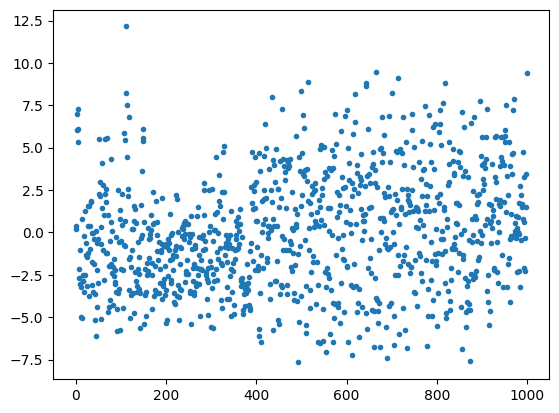

In [ ]:
# feature vector of the picture in the zeroth spot
plt.plot(X[0],'.')

In [ ]:
# histogran plot of the data in the first row or the first element of the array 'x'
# histogram will show the distribution of values within that row or element

(array([ 28., 101., 211., 215., 195., 127.,  79.,  33.,  10.,   1.]),
 array([-7.67021942, -5.68838406, -3.70654869, -1.72471333,  0.25712204,
         2.23895741,  4.22079277,  6.20262814,  8.1844635 , 10.16629887,
        12.14813423]),
 <BarContainer object of 10 artists>)

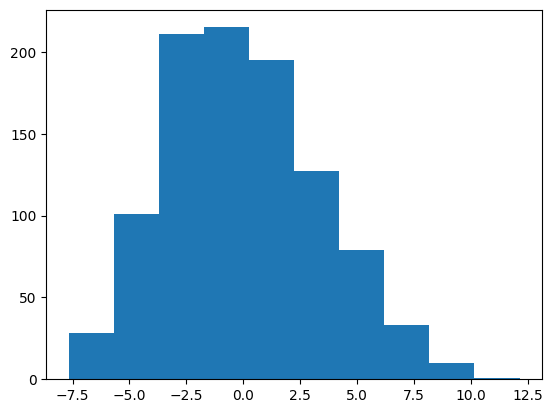

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
# defines 'softmax' function for each row, and returns the resulting probabilities

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
# defines a function that calculates the cross-entropy loss between the predicted outputs and the ground truth labels

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
# defines a function that generates random numbers from a truncated normal distribution using the 'scipy.stats.truncnorm' module.

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
# defines a function that generates samples from a truncated normal distribution.

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
# defines a function that calculates the accuracy of a model's predictions given the output '(out)' and the true labels '(y)'

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
# defines a function that seems to be part of a machine learning or data processing script

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
# defines a function that performs a matrix multiplication between 'x' and the first element of the 'w' list

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
# defines a function that would be used to track the training accuracy of a machine learning model during its training process

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
# trains a linear model
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

# trains the model for 'c.epochs' iterations
for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()
